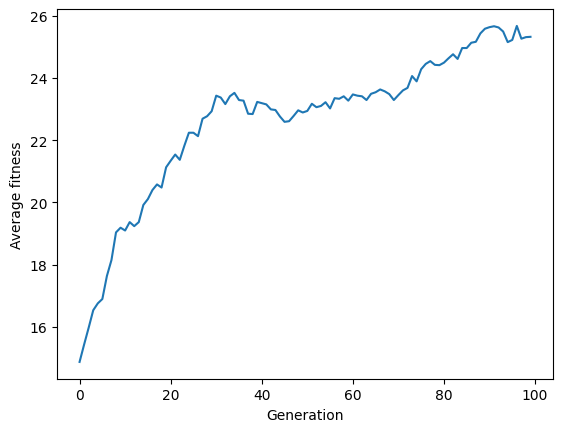

In [36]:
import random
import numpy as np
import matplotlib.pyplot as plt

String = 30
SizeOfPopulation = 100
RateOfMutation = 0.1
Generations = 100

population = np.random.randint(0, 2, size=(SizeOfPopulation, String))

def fitness(individual):
    return np.sum(individual)

FitnessRecord = []
for generation in range(Generations):
    FitnessVals = [fitness(individual) for individual in population]
    AverageFitness = np.mean(FitnessVals)
    FitnessRecord.append(AverageFitness)
    
    Parentselection = np.random.choice(SizeOfPopulation, size=SizeOfPopulation, replace=True, p=FitnessVals/np.sum(FitnessVals))
    Parents = population[Parentselection]
    
    Parents = population[Parentselection]
    
    
    Children = np.empty_like(Parents)
    for i in range(0, SizeOfPopulation, 2):
        if i == SizeOfPopulation - 1:
            Children[i] = Parents[i]
        else:
            crossover_point = random.randint(1, String - 1)
            Children[i] = np.concatenate((Parents[i][:crossover_point], Parents[i+1][crossover_point:]))
            Children[i+1] = np.concatenate((Parents[i+1][:crossover_point], Parents[i][crossover_point:]))
    
   
    mutation_mask = np.random.random(size=(SizeOfPopulation, String)) < RateOfMutation
    Children[mutation_mask] = 1 - Children[mutation_mask]
    
   
    population = Children


plt.plot(FitnessRecord)
plt.xlabel('Generation')
plt.ylabel('Average fitness')
plt.show()